In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
from sqlalchemy import inspect

In [12]:
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [13]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# Find the most recent date in the data set.
measurement = Base.classes.measurement

latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
latest_date

('2017-08-23',)

In [15]:
# Calculate the date one year from the last date in data set.
last_twelve_months = dt.datetime.strptime(latest_date[0], '%Y-%m-%d') - dt.timedelta(days=366)
last_twelve_months

datetime.datetime(2016, 8, 22, 0, 0)

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Perform a query to retrieve the data and precipitation scores 
import datetime as dt

p_results = session.query(measurement.date, measurement.prcp).\
                    filter(measurement.date >= last_twelve_months).all()
                  
p_results


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [17]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_god = pd.DataFrame(p_results, columns=['date', 'precipitation'])
rain_god.set_index(rain_god['date'], inplace=True)
rain_god

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00
...,...,...
2017-08-19,2017-08-19,0.09
2017-08-20,2017-08-20,NaN
2017-08-21,2017-08-21,0.56


In [18]:
# Sort the dataframe by date
rain_date = rain_god.sort_index()
rain_date


,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


<function matplotlib.pyplot.show(close=None, block=None)>

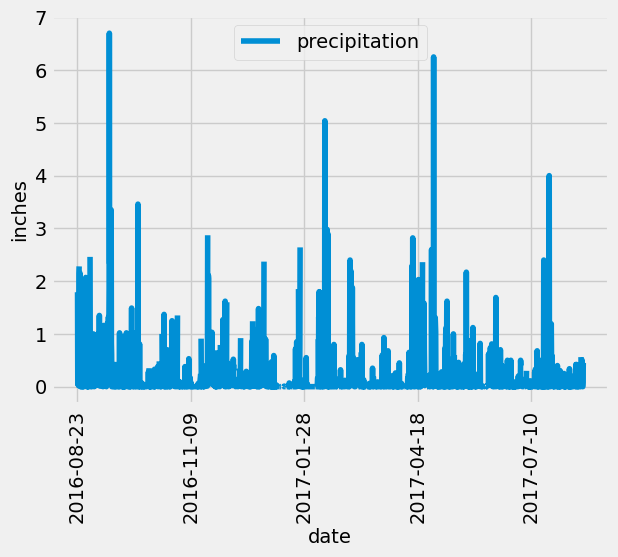

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
rain_date.plot(rot=90, ylabel ='inches', xlabel='date')
plt.savefig("../Precipitation.png")
plt.show

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_stats = pd.DataFrame(rain_god['precipitation'].describe())
rain_stats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
station = Base.classes.station
session.query(func.count(station.station)).all()

[(9,)]

In [22]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_please = session.query(measurement.station, func.count(measurement.station)).\
            group_by(measurement.station).\
            order_by(func.count(measurement.station).desc()).all()
stations_please

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
best_station = stations_please[0][0]
session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
                filter(measurement.station == best_station).all()

[(54.0, 71.66378066378067, 85.0)]

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
its_gettin_hot_in_here = session.query(measurement.station, measurement.tobs).\
                filter(measurement.station == best_station).\
                filter(measurement.date >= last_twelve_months).all()
tobs_df = pd.DataFrame(its_gettin_hot_in_here, columns=['station', 'tobs'])
tobs_df.set_index('station', inplace=True)
tobs_df.index.name = None  # Remove the index name
tobs_df


,tobs
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
...,...
USC00519281,77.0
USC00519281,77.0
USC00519281,76.0
USC00519281,76.0


<function matplotlib.pyplot.show(close=None, block=None)>

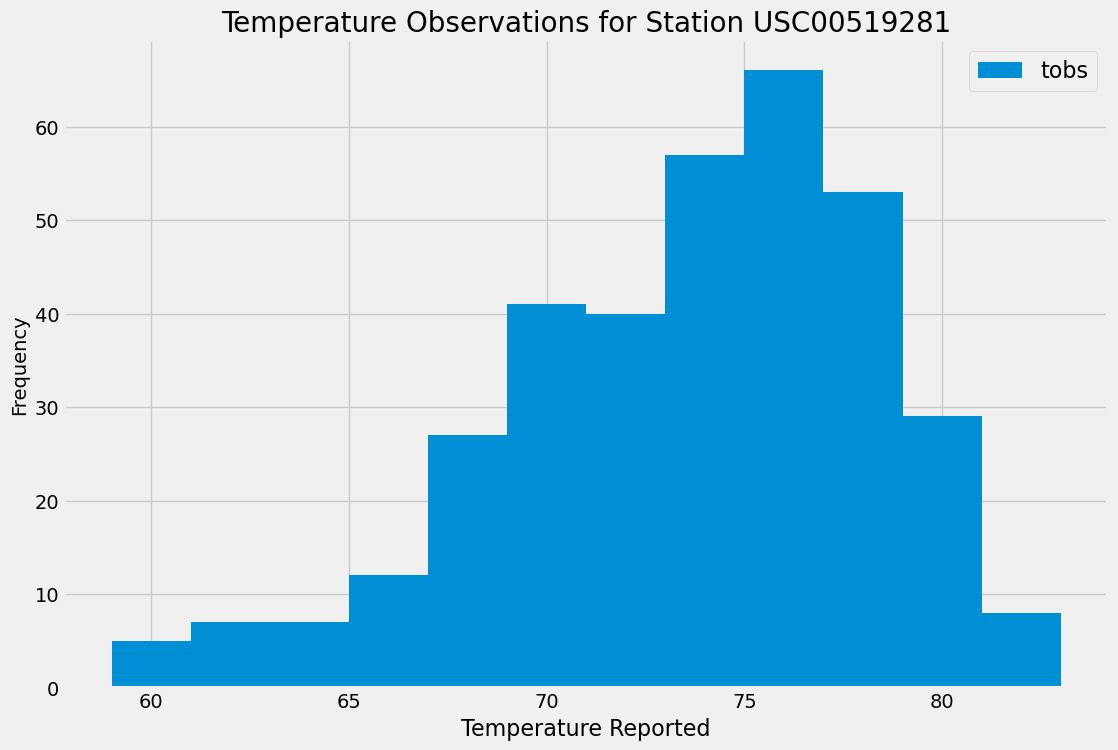

In [26]:
# Plot the results as a histogram with bins=12.
tobs_df.plot.hist(bins=12, figsize=(12,8))
plt.title("Temperature Observations for Station " + best_station, fontsize=20)
plt.xlabel("Temperature Reported", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.savefig("../StationTemps.png")
plt.show

# Close Session

In [27]:
# Close Session
session.close()

In [28]:
# use Flask to create your routes as follows:
from flask import Flask, jsonify
engine = create_engine("sqlite:///hawaii.sqlite")

In [29]:
#################################################
# Database Setup
#################################################
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [37]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()
# reflect the tables
measurement = Base.classes.measurement
app = Flask(__name__)
station = Base.classes.station

# create a session
session = Session(engine)

In [31]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [32]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [34]:
# Join all the order names for the Measurement and Station classes. 
# This returns a warning so the query should be filtered on a common order name.
session.query(measurement.station, station.station).limit(200).all()

/var/folders/b2/1dk5_g9d449_swwl06t8hhjm0000gn/T/ipykernel_62079/1538807385.py:3: SAWarning: SELECT statement has a cartesian product between FROM element(s) "measurement" and FROM element "station".  Apply join condition(s) between each element to resolve.
  session.query(measurement.station, station.station).limit(200).all()


[('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC0051

In [36]:
same_order = session.query(measurement, station).filter(measurement.station == station.station).limit(10).all()

for record in same_order:
    (measurement, station) = record
    print(measurement.station, measurement.date, measurement.prcp, measurement.tobs)
    print()
    print(station.station, station.name, station.latitude, station.longitude, station.elevation)

USC00519397 2010-01-01 0.08 65.0

USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-02 0.0 63.0

USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-03 0.0 74.0

USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-04 0.0 76.0

USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-06 None 73.0

USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-07 0.06 70.0

USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-08 0.0 64.0

USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-09 0.0 68.0

USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-10 0.0 73.0

USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-11 0.01 64.0

USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0


In [41]:
#################################################
# Flask Routes
#################################################
@app.route("/")
def homepage():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation/>>"
        f"/api/v1.0/stations/>"
        f"/api/v1.0/tobs/>"
    )


AssertionError: View function mapping is overwriting an existing endpoint function: homepage

In [ ]:

@app.route("/api/v1.0/precipitation")
def precipitation():
    # Create our session (link) from Python to the DB
    session = Session(engine)

    """Return a list of all precipitation names"""
    # Query all precipitation
    results = session.query(measurement.prcp).all()

    session.close()

        # Create a dictionary from the row data and append to a list of all_passengers
    all_precipitation = []
    for name, age, sex in results:
        precipitation_dict = {}
        precipitation_dict["name"] = name
        precipitation_dict["age"] = age
        precipitation_dict["sex"] = sex
        all_precipitation.append(precipitation_dict)

    # Convert list of tuples into normal list
    all_prcp = list(np.ravel(results))

    return jsonify(all_prcp)

@app.route("/api/v1.0/stations/>")
def station():
    # Create our session (link) from Python to the DB
    session = Session(engine)

    """Return a list of all station names"""
    # Query all stations
    results = session.query(measurement.station).all()

    session.close()

    # Convert list of tuples into normal list
    all_stations = list(np.ravel(results))

    return jsonify(all_stations)

@app.route("/api/v1.0/tobs/>")
def tobs():
    # Create our session (link) from Python to the DB
    session = Session(engine)

    """Return a list of all station names"""
    # Query all stations
    results = session.query(measurement.station).all()

    session.close()

    # Convert list of tuples into normal list
    all_tobs = list(np.ravel(results))

    return jsonify(all_tobs)

if __name__ == '__main__':
    app.run(debug=True)
